# 6.0M Yaguaraparo Earthquake (VEN)
2024-06-23 03:57:58 (UTC) 10.692°N 62.687°W 77.0 km depth

In this notebook, we will study the magnitude 6.0 earthquake that occurred 20 km northeast of Yaguaraparo, Venezuela. This earthquake was recorded by the USGS. https://earthquake.usgs.gov/earthquakes/eventpage/us7000mu1p/executive.
For this study, we will use seismograms from the ten stations closest to the seismic event from the USGS, and data (seismograms and seismicity) provided by the seismological network of FUNVISIS (Fundación Venezolana de Investigaciones Sismológicas)(https://funvisis.gob.ve)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from obspy import read
from obspy import UTCDateTime
import matplotlib.dates as mdates
from datetime import datetime
import os


## 1. Seismological Stations
This map displays the seismological stations that recorded the 6.0 Mw earthquake, the red star shows the epicenter provided by USGS is represented 

+ **Yellow triangles** represent the Funvisis stations used to locate the earthquake. Information about the station coordinates used for mapping is available in the file "estaciones_fun.txt."

+ **Green triangles** represent the eight closest stations from the IU and CU networks downloaded from IRIS Seismic Waveform Data (Wilber 3).


For selecting stations in Wilber 3:

+ Go to the Wilber statios for selecting stations https://ds.iris.edu/wilber3/find_stations/11855541
+ Go to the bottom lists and use the checkboxes below to add the ten stations closest to the seismic event. Some stations may coincide with those used by Funvisis. In this case, only seven unique stations will be selected.
+ Click the "Download Stations" button in the bottom right corner to download a file named "wilber-station.txt" containing information about the selected station coordinates.

For mapping we use the script "estaciones.sh" which is a bash script containing GMT commands for mapping all the selected stations. The last two lines of the script convert the ps file to eps and then  a png file. We comment this line and use the png file generated. The next cell plot the station map

In [2]:
# Run GMT script for generate the station map
os.system('sh estaciones.sh')
# In the script I don't need to use the name gmt before a gmt command i.e, a use
#> psxy -R -J .. 
# instead of
#> gmt psxy -R -J ..

0

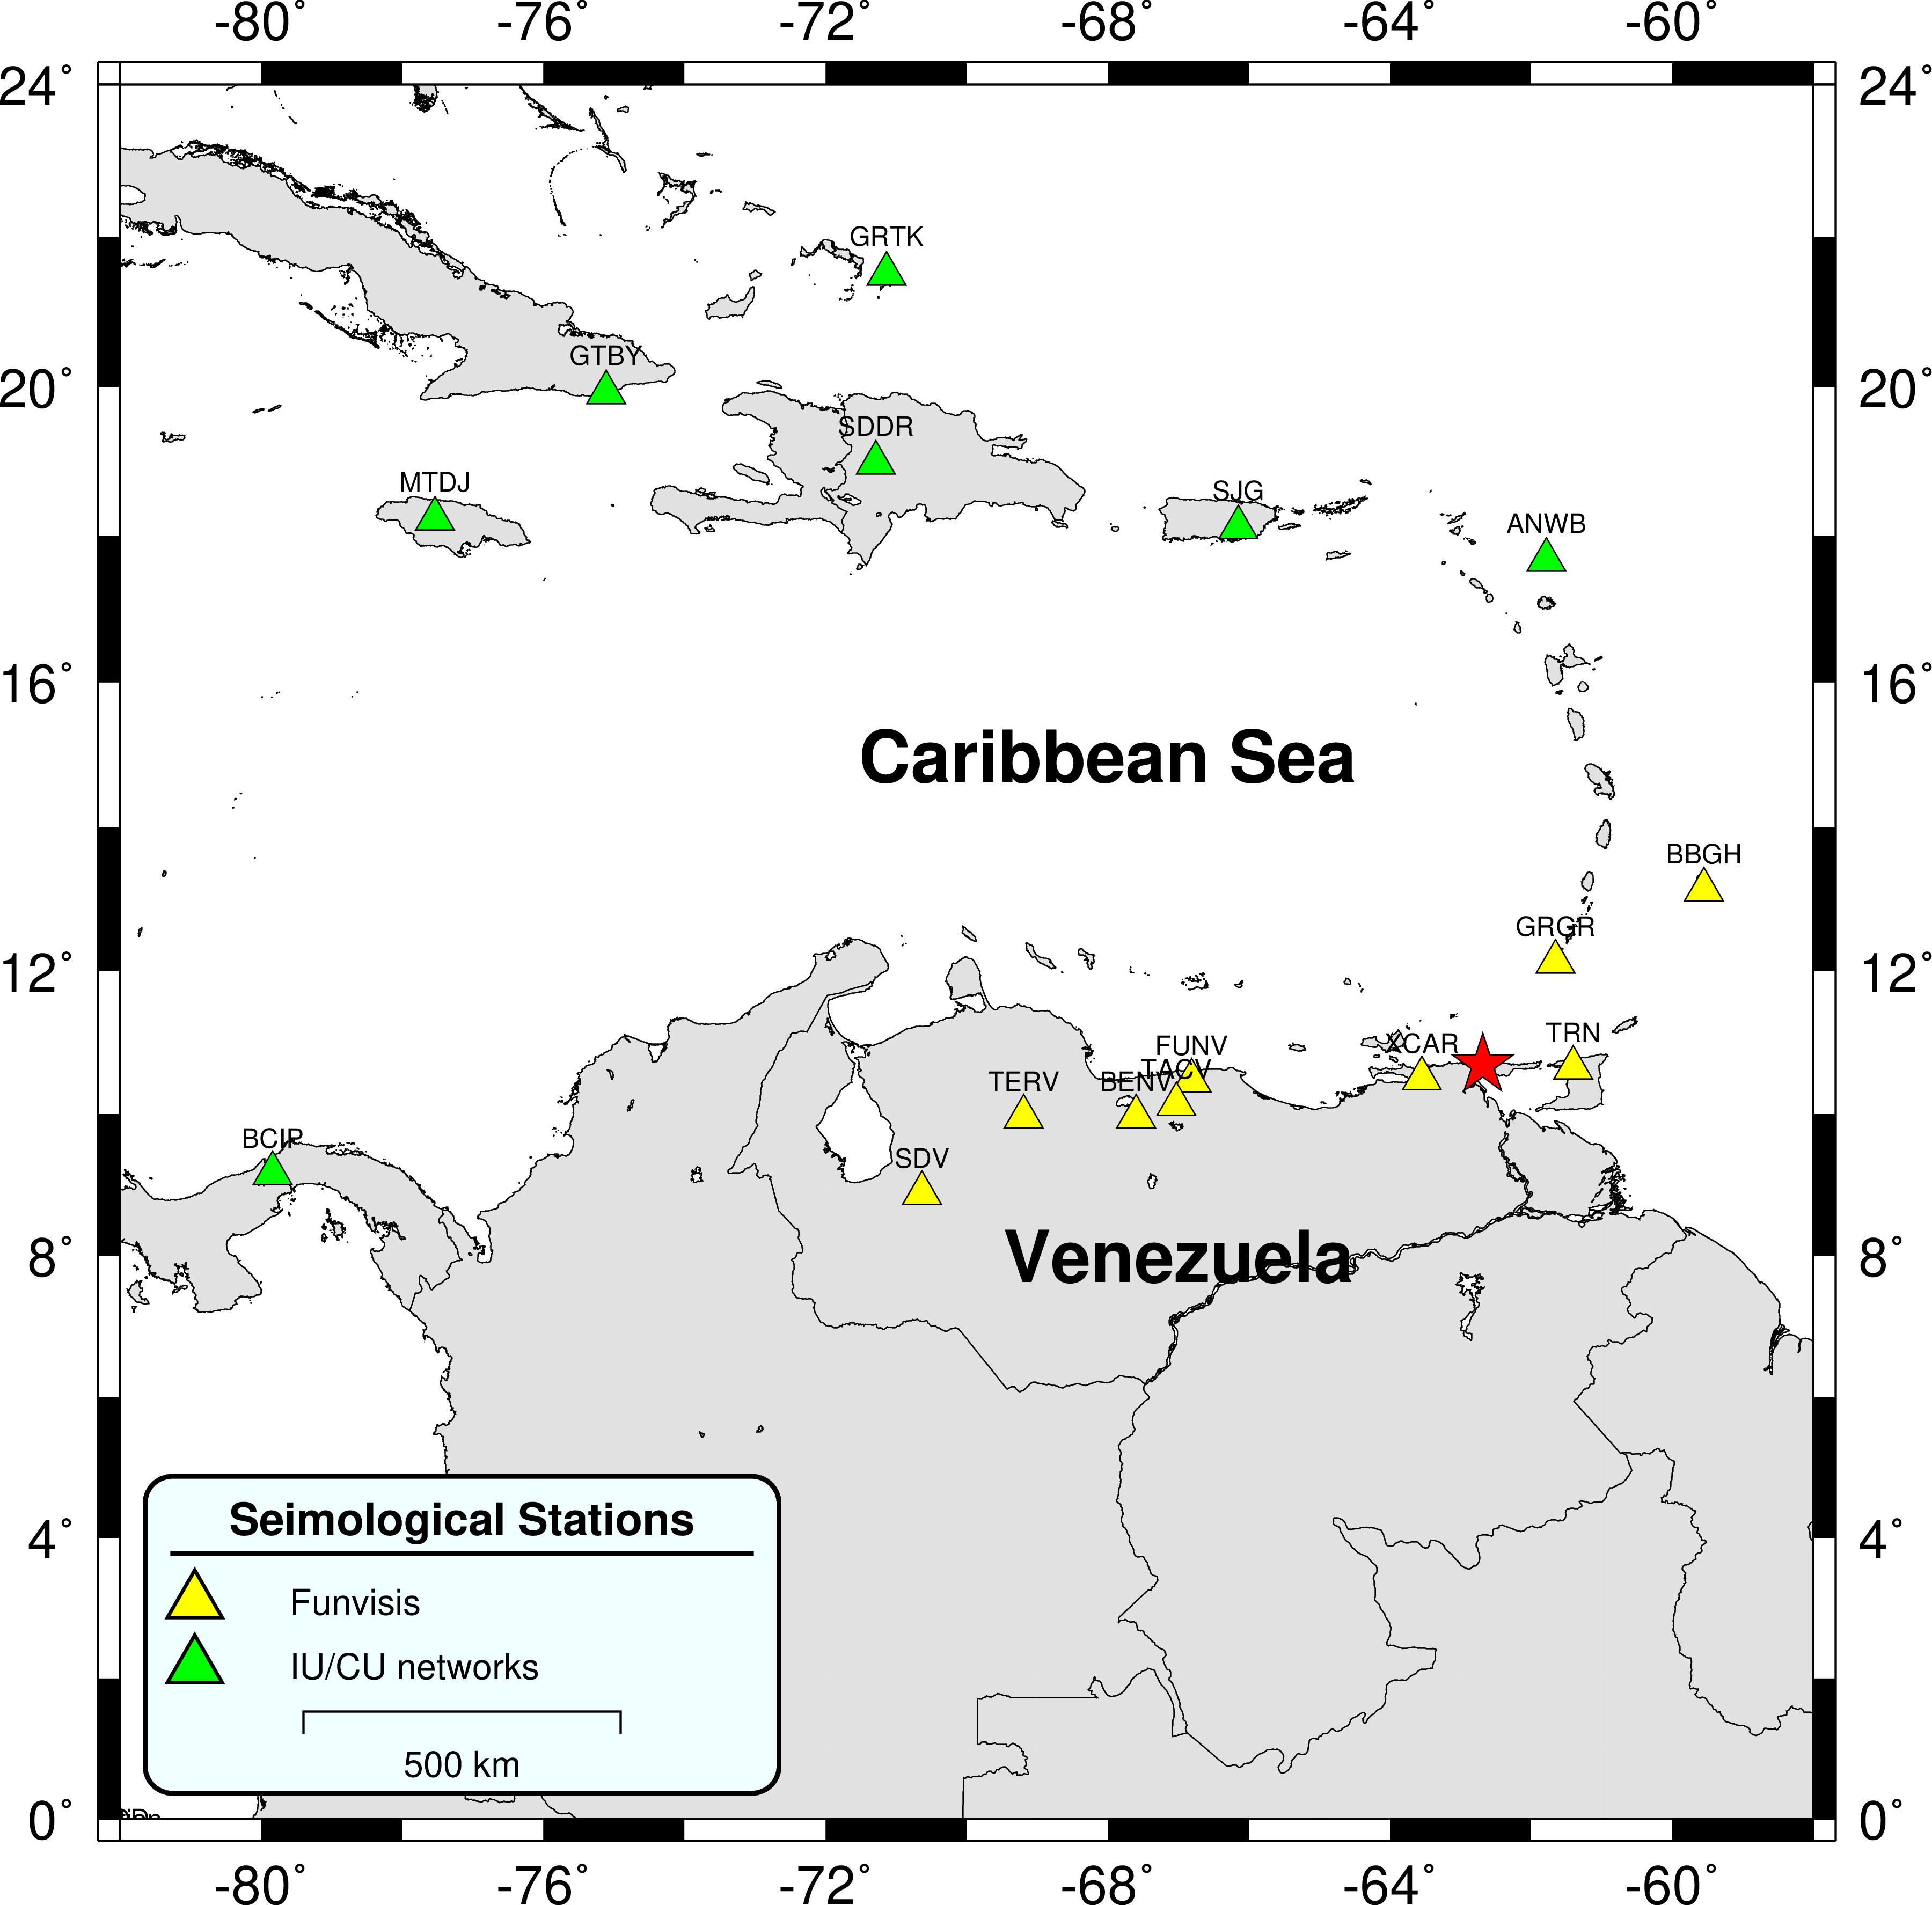

In [3]:
# The file stations.png was loaded in case you can convert from ps to png 
from IPython import display
display.Image("stations.png")

## 2. Seismicity 2021 - 2024

The catalog of the seismicity registered by Funvisis stations from January, 2021 to June, 2024 in the region between latitude 10° to 12°N and longitude 60° to 64°W is in the file called "base_sismos2021-2024.txt".

In the following code we read the catalog file and create a dataframe called "df" for plotting the cross-section

The first five lines of the catalog

In [4]:
# Read the seismicity catalog and create a dataframe called df
df = pd.read_csv("base_sismos2021-2024.txt", sep='\t')
df.head()

,year,month,day,hour,minute,sec,lat,lon,depth,mag
0,2021,1,2,3,3,15.0,10.189,-61.899,52.1,3.1
1,2021,1,3,13,42,19.6,11.046,-62.279,33.7,3.1
2,2021,1,5,22,13,43.1,11.265,-61.889,35.1,3.1
3,2021,1,6,2,35,44.8,10.226,-62.161,17.5,4.5
4,2021,1,10,16,47,58.1,10.654,-61.937,74.9,3.4


## 3. Longitude vs Depth plot

The accompanying plot depicts a cross-section of seismicity in the region from Jan,2021 to Jun,2024. We observe a concentration of shallow earthquakes between 0 and 40 kilometers depth. Beyond 40 kilometers, the plot reveals evidence of subducting Caribbean plate beneath the North american plate.

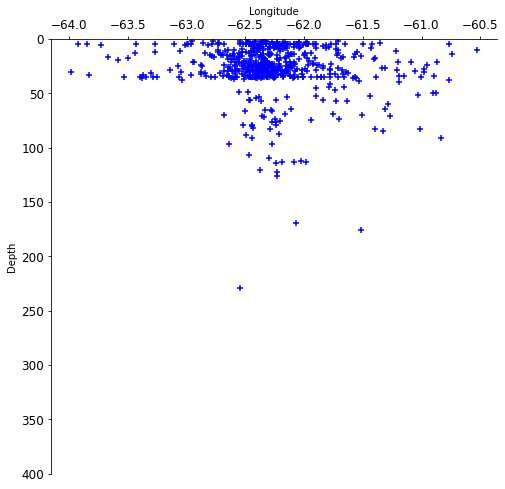

In [5]:
# Longitude vs Depth plot
fig, ax = plt.subplots(1,1, figsize=(8,8))  #Size of the plot

#Plot
ax.scatter(df.lon, df.depth, marker='+', color='blue')
ax.set_ylim(400,0)

# Customizing 
ax.spines['top'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.tick_params(labelbottom=False,labeltop=True)
ax.tick_params(labelsize=12, labeltop=True)
ax.xaxis.tick_top()

ax.xaxis.set_label_position('top') 
ax.set_xlabel("Longitude")
_=ax.set_ylabel("Depth")


## 4. Time vs Magnitude plot
In this plot we observe the time evolution of the magnitude in the region. First we need to convert columns "year", "month" and "day" to datetime with the following code

The plot illustrates the temporal evolution of earthquake magnitudes within the region from January 2021 to June 2024. To represen the time, we first converted the 'year,' 'month,' and 'day' columns into a datetime format using the following code

In [6]:
def convert2date(row):
    return(datetime(row[0], row[1], row[2]))

In [7]:
# Creating a Column in datetime format called T_orig
def modifica_df(datos):
    row = ['year','month','day']
    return (datos.assign(T_orig =lambda x: x[row].apply(convert2date,axis=1).astype("datetime64"))
     )

In [8]:
# Add a column to dataframe with the origin time in datetime format
df_tiempo = modifica_df(df)
df_tiempo.head()

,year,month,day,hour,minute,sec,lat,lon,depth,mag,T_orig
0,2021,1,2,3,3,15.0,10.189,-61.899,52.1,3.1,2021-01-02
1,2021,1,3,13,42,19.6,11.046,-62.279,33.7,3.1,2021-01-03
2,2021,1,5,22,13,43.1,11.265,-61.889,35.1,3.1,2021-01-05
3,2021,1,6,2,35,44.8,10.226,-62.161,17.5,4.5,2021-01-06
4,2021,1,10,16,47,58.1,10.654,-61.937,74.9,3.4,2021-01-10


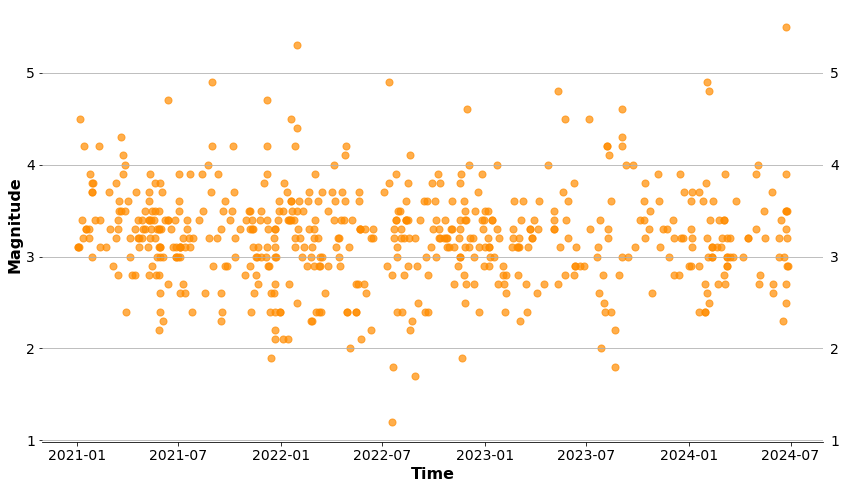

In [9]:
#Plot time vs magnitude
fig, ax = plt.subplots(1,1, figsize=(14,8)) #Size of the figure

#We use the plot method included in DataFrames
df_tiempo.plot(kind='scatter',x='T_orig',y='mag',s=50,marker='o',alpha=0.7, ax=ax, color='darkorange')

#Customizing
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(labelsize=14, labelright=True)

# Labels
ax.set_xlabel("Time",fontsize=16, fontweight='bold')
ax.set_ylabel("Magnitude", fontsize=16, fontweight='bold')
ax.yaxis.grid(True)


The graph does not show any specific pattern or precursors prior to the 6.0 magnitude earthquake. On the other hand, the magnitude shown in this graph is 5.5, which was the magnitude assigned by Funvisis.

## 6. Epicenter map
In the following map we show the epicenter from Jan 2024 to Jun 2024 for diffrent magnitudes

In [10]:
# Corre el script en GMT para generar el mapa de sismicidad
os.system('sh oriente2024.sh')

0

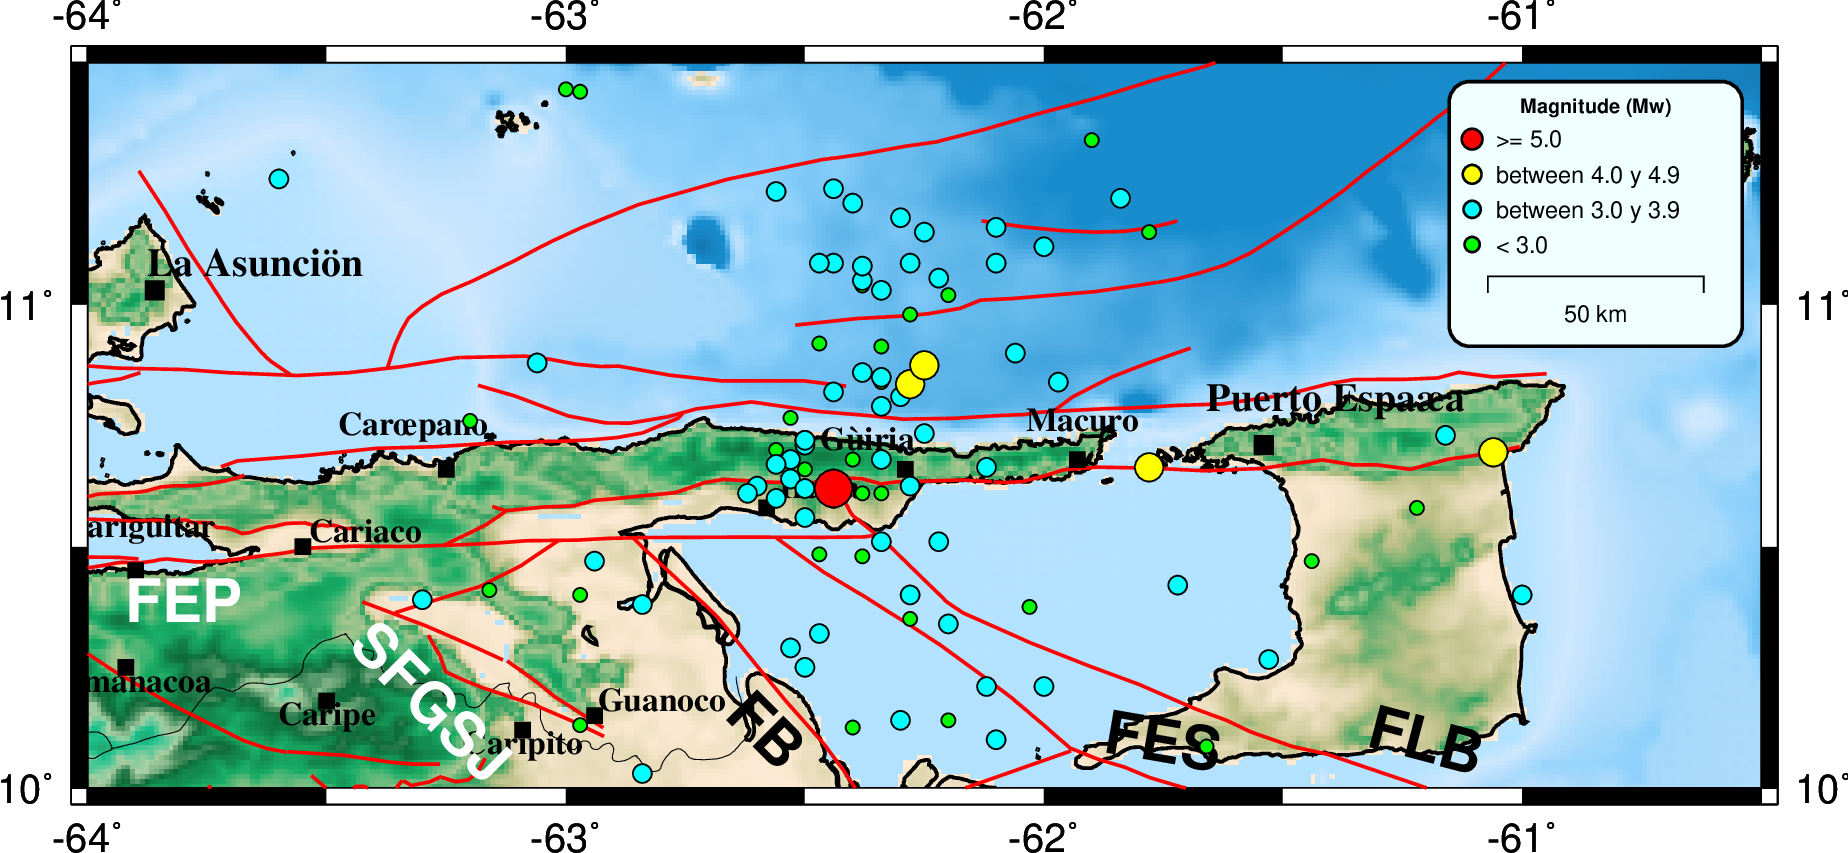

In [11]:
from IPython import display
display.Image("oriente2024.png")

This map displays the seismic activity throughout 2024, categorized by magnitude. Several earthquakes with magnitudes between 4 and 4.9, shown in proximity (northeast) to the main event (marked in red), can be seen. These events, which occurred in February, are considered potential foreshocks to the main event. The red lines represent the seismological faults.

## 7 Seismograms

We have integrated the waveforms from Funvisis and USGS in the following plot.

For the **Funvisis stations**, we use a file called S-File ("23-0356-00L.S202406"). This S-File contains all the information regarding arrival times and stations used for localization. This file is the output of the SEISAN program.

For the **USGS stations**, we downloaded the seismograms from https://ds.iris.edu/wilber3/find_stations/11855541.

In [12]:
# Create two list one with the name of the stations and  other with epicentral disances
# Stations name and distance from the source (FUNVISIS)
from estaciones_ex import estaciones_ex  #python file
ESTACIONES,DISTANCIAS = estaciones_ex("23-0356-00L.S202406")

# Stations name and distance from the source (USGS)
estaciones_int = pd.read_csv("wilber-stations2.txt", sep='|')
ESTACION_I = list(estaciones_int.Station)
DISTANCIAS_G = list(estaciones_int.Distance)


In [13]:
#reading the waveforms from Funvisis
st=[]
for estacion in ESTACIONES:
    filename='./SismoOriente2024/FUNV/2024-06-23-0356-00M.'+estacion+'*Z'
    st +=read(filename) 
tiempo_mpl = st[0].times(type = 'matplotlib')

#reading the waveform from USGS
sta_a=[]
for estacion in ESTACION_I:
    filename='./SismoOriente2024/USGS/2024-06-23*'+estacion+'*Z'
    #print(filename)
    sta_a +=read(filename) 

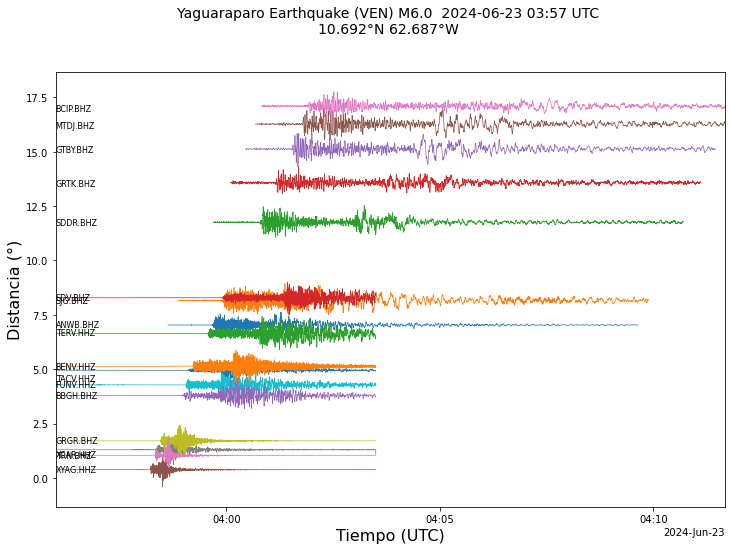

In [14]:
fig = plt.figure( figsize=(12,8) )
ax = fig.subplots()

ax.set_title("Yaguaraparo Earthquake (VEN) M6.0 " +" 2024-06-23 03:57 UTC \n" + 
                "10.692°N 62.687°W \n"+"\n",fontsize = 14)
tmin = []
tmax = []
for est, tr in enumerate(sta_a):
    sta  = tr.stats.station
    chan = tr.stats.channel
            
    datos = tr.data
    max_a = np.abs(datos).max()
    #print(DISTANCIAS[est]+datos/max_a)
    tmin.append(tiempo_mpl[0])
    tmax.append(tiempo_mpl[-1])
    tiempo_mpl = tr.times(type = 'matplotlib')
    label =  sta + '_' + chan
    ax.plot( tiempo_mpl, DISTANCIAS_G[est]+datos/max_a*0.8,  lw=.7 )
    
    ax.set_xlabel('Tiempo (UTC)', fontsize=16)
    ax.set_ylabel('Distancia (°)', fontsize=16)
    
    locator = ax.xaxis.set_major_locator(mdates.AutoDateLocator())
    ax.xaxis.set_major_formatter(mdates.ConciseDateFormatter(locator))
    
ax.set_xlim(min(tmin), max(tmax))

for est, tr in enumerate(sta_a):
    sta  = tr.stats.station
    ax.text(min(tmin), DISTANCIAS_G[est], sta+'.'+chan, fontsize=8, va='center' )
    
for est, tr in enumerate(st):
    sta  = tr.stats.station
    chan = tr.stats.channel
            
    datos = tr.data
    max_a = np.abs(datos).max()
        
    tiempo_mpl = tr.times(type = 'matplotlib')
    label =  sta + '_' + chan
    ax.plot( tiempo_mpl, DISTANCIAS[est]/111+datos/max_a*0.8,  lw=.7 )
    
    ax.set_xlim(tiempo_mpl[0], max(tmax))
    
    ax.set_xlabel('Tiempo (UTC)', fontsize=16)
    ax.set_ylabel('Distancia (°)', fontsize=16)
    ax.text(tiempo_mpl[1], DISTANCIAS[est]/111, sta+'.'+chan, fontsize=8, va='center' )
        
    locator = ax.xaxis.set_major_locator(mdates.AutoDateLocator())
    ax.xaxis.set_major_formatter(mdates.ConciseDateFormatter(locator))

The seismograms from the Yaguaraparo earthquake are plotted in order of increasing distance from the epicenter. The nearest ten stations were operated by Funvisis, while the more distant stations were primarily from the USGS network. The plot reveals that surface waves become evident at stations SJG, SDDR, GRTK, MTDJ, and BCIP onward. Surface wave arrivals are less pronounced at closer stations.

## 7.0 Spectrograms
In the following plots we show the spectrogram for two station: XCAR the closets station and BCIP the most distance station

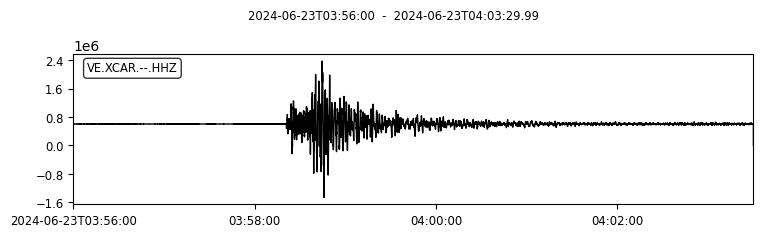

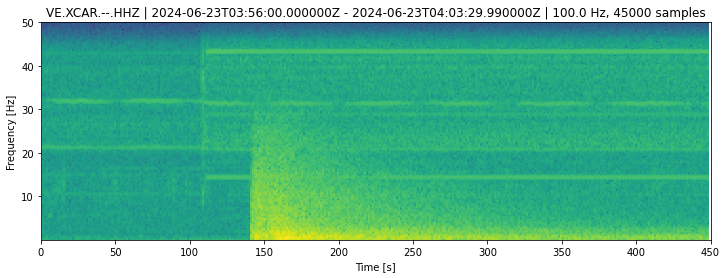

In [15]:
#Spectrograms
traz = st[0] #Extract the firts trace of the FUNV seismogramas
fig = traz.plot() #Seismogram

plt.rcParams['figure.figsize']=(12,4)
fig = traz.spectrogram(show = False,per_lap=.5, wlen=2,log =False,dbscale=True)
ax = fig.axes[0]
im = ax.images[0]

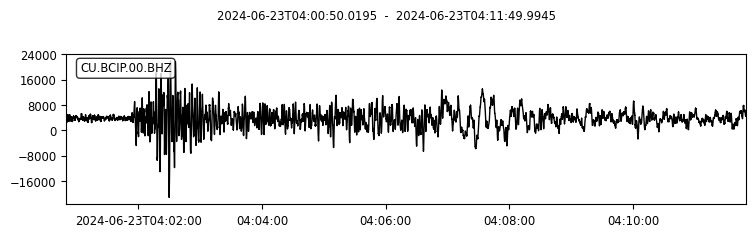

(-92.677352502169711, 87.547333590015086)


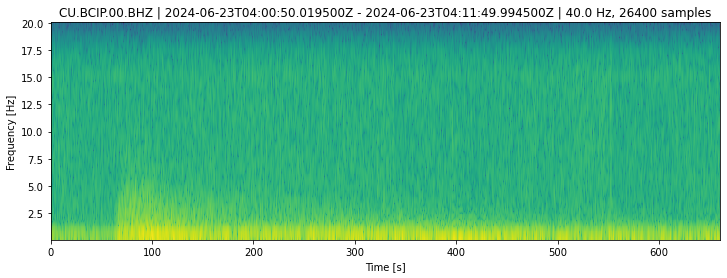

In [16]:
# Spectogram for BCIP
traz2 = sta_a[6]
traz2.plot()
fig = traz2.spectrogram(show=False, per_lap=.5, wlen=2, dbscale=True)
ax = fig.axes[0]
#ax.set_ylim(0, 20)
im = ax.images[0]
print(im.get_clim())

## Conclusions
+ In this notebook, we conduct a study of the **M6.0 Yaguaraparo earthquake, June 23, 2024**. To do this, we use seismograms recorded by different networks: 10 stations from the Funvisis network and 7 stations from the CU and IU networks.

+ While the USGS reported a magnitude of 6.0 for this earthquake, the Funvisis agency gave a lower estimate of 5.5.

+ The temporal evolution of earthquake magnitudes within the region from January, 2021 to June, 2024 was plotted. The graph does not show any specific pattern or precursors prior to the 6.0 magnitude earthquake.

+ The seismograms from the Yaguaraparo earthquake are plotted. The plot reveals that surface waves become evident at stations SJG, SDDR, GRTK, MTDJ, and BCIP onward. Surface wave arrivals are less pronounced at closer stations.